## Data Prep

In [134]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [135]:
# Set up the data
df_research = pd.read_csv("papers_with_models.csv")
df_released = pd.read_csv("Epoch Database - Notable Systems.csv")

df_research["date"] = pd.to_datetime(df_research["publication date (first revision)"])
df_research["year"] = pd.to_datetime(df_research["date"]).dt.year
df_research["param count"] = pd.to_numeric(df_research["param count"], errors="coerce")
df_research["Type"] = "Models used in research"

df_released["date"] = pd.to_datetime(df_released["Publication date"])
df_released["year"] = df_released["date"].dt.year
df_released["param count"] = pd.to_numeric(df_released["Parameters"], errors="coerce")
df_released["Type"] = "Models released"

In [136]:
df_research

,paper,publication date (first revision),link,model family,model,param count,notes,Unnamed: 7,date,year,Type
0,"Z. Wu, A. Geiger, T. Icard, C. Potts, and N. G...",2023-05-15,https://arxiv.org/abs/2305.08809,NaN,Alpaca,7000000000,notes,NaN,2023-05-15,2023,Models used in research
1,"N. De Cao, W. Aziz, and I. Titov. Editing fact...",2021-04-16,https://arxiv.org/abs/2104.08164,bart,BART base,139000000,BERT (fintuned),NaN,2021-04-16,2021,Models used in research
2,"S. Ravfogel, M. Twiton, Y. Goldberg, and R. D....",2022-01-28,https://arxiv.org/abs/2201.12091,NaN,BERT,340000000,didnt specify whether they used the big or sma...,NaN,2022-01-28,2022,Models used in research
3,"A. Geiger, Z. Wu, H. Lu, J. Rozner, E. Kreiss,...",2021-12-1,https://arxiv.org/abs/2112.00826,NaN,bert,110000000,NaN,NaN,2021-12-01,2021,Models used in research
4,"A. Geiger, H. Lu, T. Icard, and C. Potts. Caus...",2021-06-06,https://arxiv.org/abs/2106.02997,bert,bert,110000000,also studied a bilstm,NaN,2021-06-06,2021,Models used in research
...,...,...,...,...,...,...,...,...,...,...,...
185,"N. De Cao, M. S. Schlichtkrull, W. Aziz, and I...",2020-04-30,https://arxiv.org/abs/2004.14992,NaN,NaN,340000000,"BERT-based, BERTLarge",NaN,2020-04-30,2020,Models used in research
186,"P. M. Htut, J. Phang, S. Bordia, and S. R. Bow...",2019-11-27,https://arxiv.org/abs/1911.12246,NaN,NaN,110000000,"BERT, Roborta",NaN,2019-11-27,2019,Models used in research
187,"O. Kovaleva, A. Romanov, A. Rogers, and A. Rum...",2019-08-21,https://arxiv.org/abs/1908.08593,NaN,NaN,110000000,BERT,NaN,2019-08-21,2019,Models used in research
188,"P. Michel, O. Levy, and G. Neubig. Are sixteen...",2019-05-25,https://arxiv.org/abs/1905.10650,NaN,NaN,110000000,BERT,NaN,2019-05-25,2019,Models used in research


In [137]:
# Filter the published DataFrame to include only models from 2019 to 2024
df_released = df_released[(df_released["year"] >= 2019) & (df_released["year"] <= 2024)]

# Sort both DataFrames by date
df_research = df_research.sort_values(by="date")
df_published = df_released.sort_values(by="date")

# Filter for language models only
df_released = df_released[df_released["Domain"].str.contains("Language")]

# Filter for open models only
df_released = df_released[
    df_released["Model accessibility"].str.contains("Open access", na=False)
]

# Filter out rows with NaN in 'param_count'
df_released = df_released.dropna(subset=["param count"])

# - [ ] answer David about the skyline model


In [138]:
# Combine both DataFrames
df_combined = pd.concat(
    [
        df_research[["year", "date", "param count", "Type"]],
        df_released[["year", "date", "param count", "Type"]],
    ],
    ignore_index=True,
)

## Box Plot

In [139]:
df_combined

,year,date,param count,Type
0,2019,2019-02-04,3.400000e+08,Models used in research
1,2019,2019-03-21,3.400000e+08,Models used in research
2,2019,2019-05-15,1.240000e+08,Models used in research
3,2019,2019-05-15,3.400000e+08,Models used in research
4,2019,2019-05-25,1.100000e+08,Models used in research
...,...,...,...,...
290,2019,2019-05-14,3.400000e+07,Models released
291,2019,2019-03-26,1.100000e+08,Models released
292,2019,2019-02-14,1.500000e+09,Models released
293,2019,2019-01-31,3.300000e+08,Models released


In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set the theme and style for paper-quality plots
sns.set_theme(style="whitegrid", context="paper")

# sns.set_theme(style="whitegrid")
plt.rcParams.update(
    {
        "font.size": 20,
        "axes.labelsize": 35,
        "axes.titlesize": 45,
        "xtick.labelsize": 35,
        "ytick.labelsize": 35,
        "legend.fontsize": 20,
        "legend.title_fontsize": 25,
    }
)


In [ ]:

plt.figure(figsize=(15, 6))
palette = {"Models used in research": "#00A8E8", "Models released": "#FF3366"}

# Define the order of 'Type' and 'year' for consistency
hue_order = ["Models used in research", "Models released"]
year_order = sorted(df_combined["year"].unique())

# Create boxplot without fliers and with specified order
ax = sns.boxplot(
    x="year",
    y="param count",
    hue="Type",
    data=df_combined,
    palette=palette,
    order=year_order,
    hue_order=hue_order,
    width=0.5,
    linewidth=3,
    showfliers=False,
    gap=0.1,
)

# Set the Y-axis to a logarithmic scale
ax.set_yscale("log")

# Add titles and labels
ax.set_title("Distribution of Model Sizes by Year", fontweight="bold", pad=20)
ax.set_xlabel("Year", fontweight="bold", labelpad=15, fontsize=23)  # Changed fontsize
ax.set_ylabel(
    "Model Size (Number of Parameters)", fontweight="bold", labelpad=15, fontsize=23
)  # Changed fontsize

# Customize tick labels
ax.tick_params(axis="both", which="major", labelsize=20)

# Remove the spines
sns.despine()

# Calculate and plot median values with connecting lines
for i, year in enumerate(year_order):
    medians = [
        df_combined[(df_combined["year"] == year) & (df_combined["Type"] == t)][
            "param count"
        ].median()
        for t in ["Models used in research", "Models released"]
    ]

    if not any(np.isnan(medians)):
        x1, x2 = i - 0.15, i + 0.15
        plt.plot(
            [x1, x2], medians, color="gold", linestyle="--", linewidth=2.5, zorder=5
        )
        gap_ratio = max(medians) / min(medians)
        plt.text(
            i,
            np.sqrt(medians[0] * medians[1]),
            f"{gap_ratio:.1f}x",
            ha="center",
            va="center",
            bbox=dict(facecolor="gold", edgecolor="gold", alpha=1),
            zorder=20,
        )


# Prepare outlier data using the IQR method
def is_outlier(s):
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    return (s < q1 - 1.5 * iqr) | (s > q3 + 1.5 * iqr)


outlier_data = (
    df_combined.groupby(["year", "Type"])
    .apply(lambda x: x[is_outlier(x["param count"])])
    .reset_index(drop=True)
)

# Create a mapping from (year, Type) to x positions
n_hues = len(hue_order)
box_width = 0.5
dodge_range = box_width / n_hues

x_offsets = {t: (i - 0.5) * dodge_range for i, t in enumerate(hue_order)}

# Plot outliers manually using plt.scatter for precise alignment
for _, row in outlier_data.iterrows():
    year_index = year_order.index(row["year"]) if row["year"] in year_order else None
    if year_index is not None:
        # Calculate x position and plot the outlier
        x_pos = year_index + x_offsets.get(row["Type"], 0)
        plt.scatter(
            x_pos,
            row["param count"],
            color=palette.get(row["Type"], "gray"),
            linewidth=1,
            alpha=0.7,
            s=60,
            zorder=15,
        )

ax.legend(
    title="Model Type",
    # title_fontsize="16",
    # fontsize="14",
    loc="upper left",
    frameon=True,
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
# plt.tight_layout()

# Save the current figure as a PDF suitable for ICLR paper
plt.savefig(
    "../figures/scatterplot.pdf",
    format="pdf",
    bbox_inches="tight",
    dpi=300,
    metadata={
        "Title": "Model Size Boxplot",
        "Author": "Dmitrii Troitskii",
        "Subject": "ICLR Paper Figure",
        "Keywords": "model size, boxplot, ICLR",
    },
)

plt.show()

## Median and Max Gaps

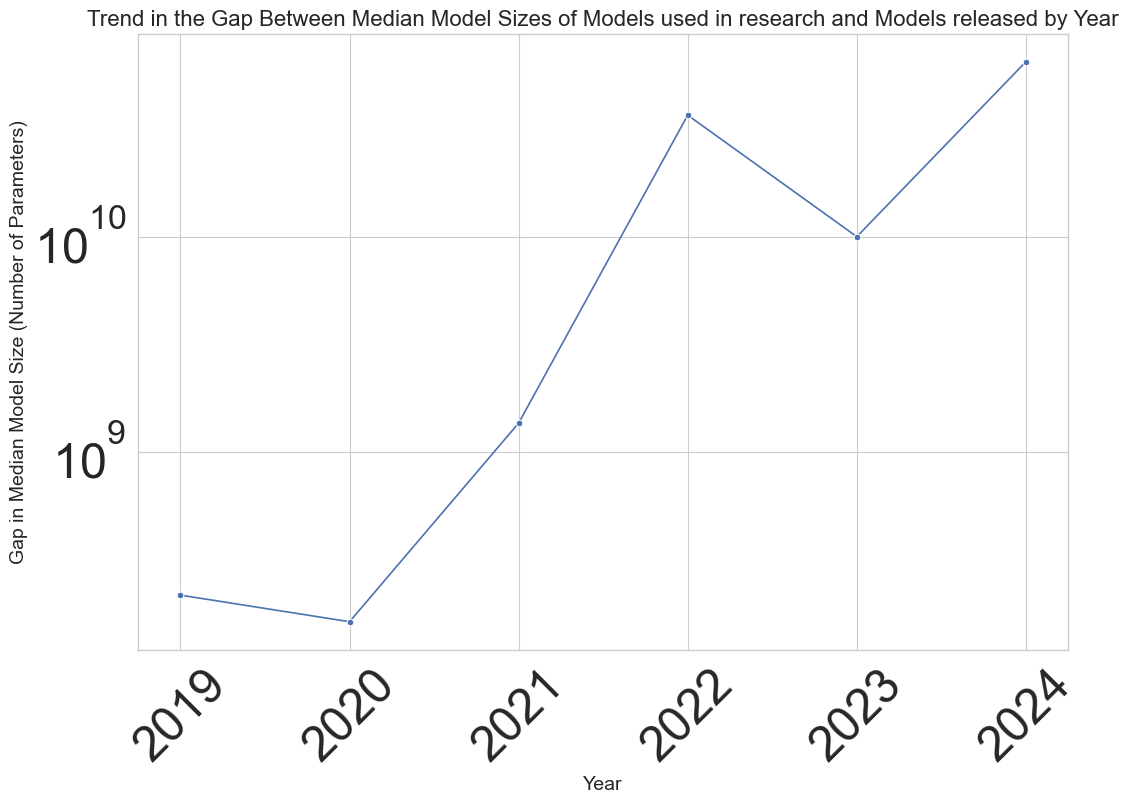

In [141]:
# Calculate the median model size for each year and type
median_sizes = (
    df_combined.groupby(["year", "Type"])["param count"].median().reset_index()
)

# Pivot the DataFrame to have 'year' as the index and 'Type' as columns
median_pivot = median_sizes.pivot(index="year", columns="Type", values="param count")

# Calculate the gap between the median sizes
median_pivot["Gap"] = (
    median_pivot["Models released"] - median_pivot["Models used in research"]
)

# Plot the trend in the gap
plt.figure(figsize=(12, 8))

sns.lineplot(data=median_pivot, x=median_pivot.index, y="Gap", marker="o")

# Set y-axis to log scale
plt.yscale("log")

# Add titles and labels
plt.title(
    "Trend in the Gap Between Median Model Sizes of Models used in research and Models released by Year",
    fontsize=16,
)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Gap in Median Model Size (Number of Parameters)", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

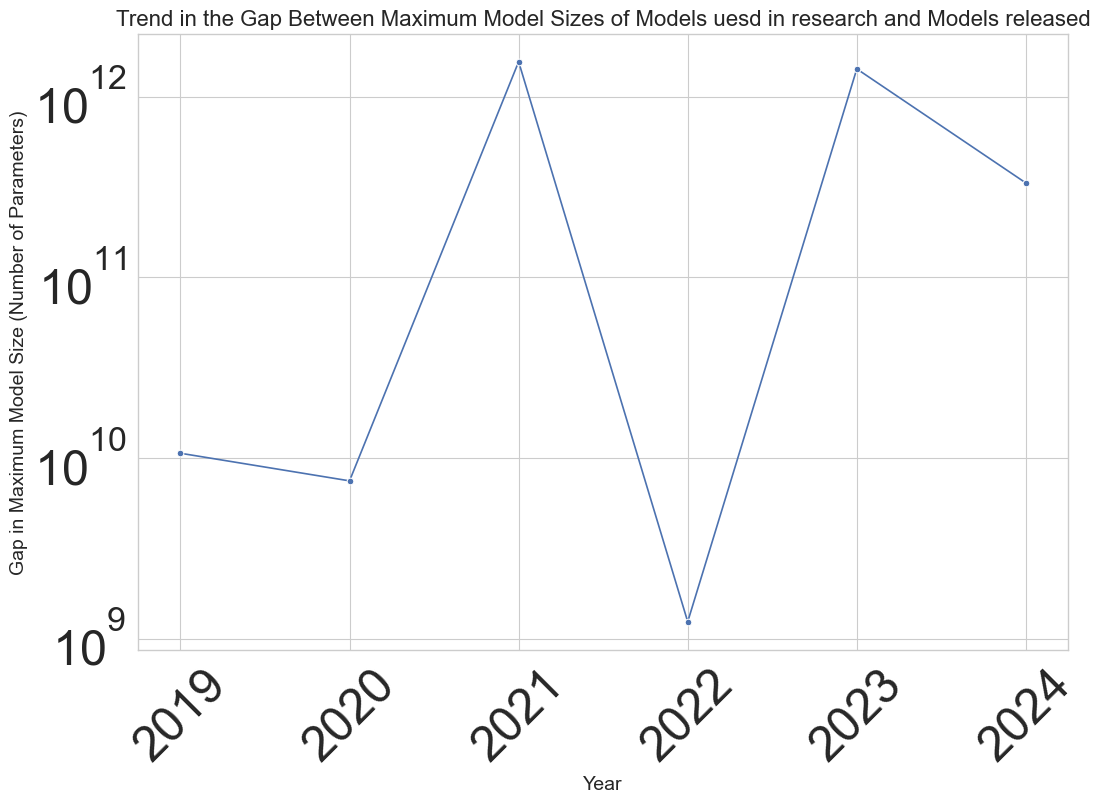

In [142]:
# Calculate the maximum model size for each year and type
max_sizes = df_combined.groupby(["year", "Type"])["param count"].max().reset_index()

# Pivot the DataFrame to have 'year' as the index and 'Type' as columns
max_pivot = max_sizes.pivot(index="year", columns="Type", values="param count")

# Calculate the gap between the maximum sizes
max_pivot["Gap"] = max_pivot["Models released"] - max_pivot["Models used in research"]

# Plot the trend in the gap for maximum sizes
plt.figure(figsize=(12, 8))
sns.lineplot(data=max_pivot, x=max_pivot.index, y="Gap", marker="o")

# Set y-axis to log scale
plt.yscale("log")

# Add titles and labels
plt.title(
    "Trend in the Gap Between Maximum Model Sizes of Models uesd in research and Models released",
    fontsize=16,
)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Gap in Maximum Model Size (Number of Parameters)", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Scatterplot (Rolling Median)

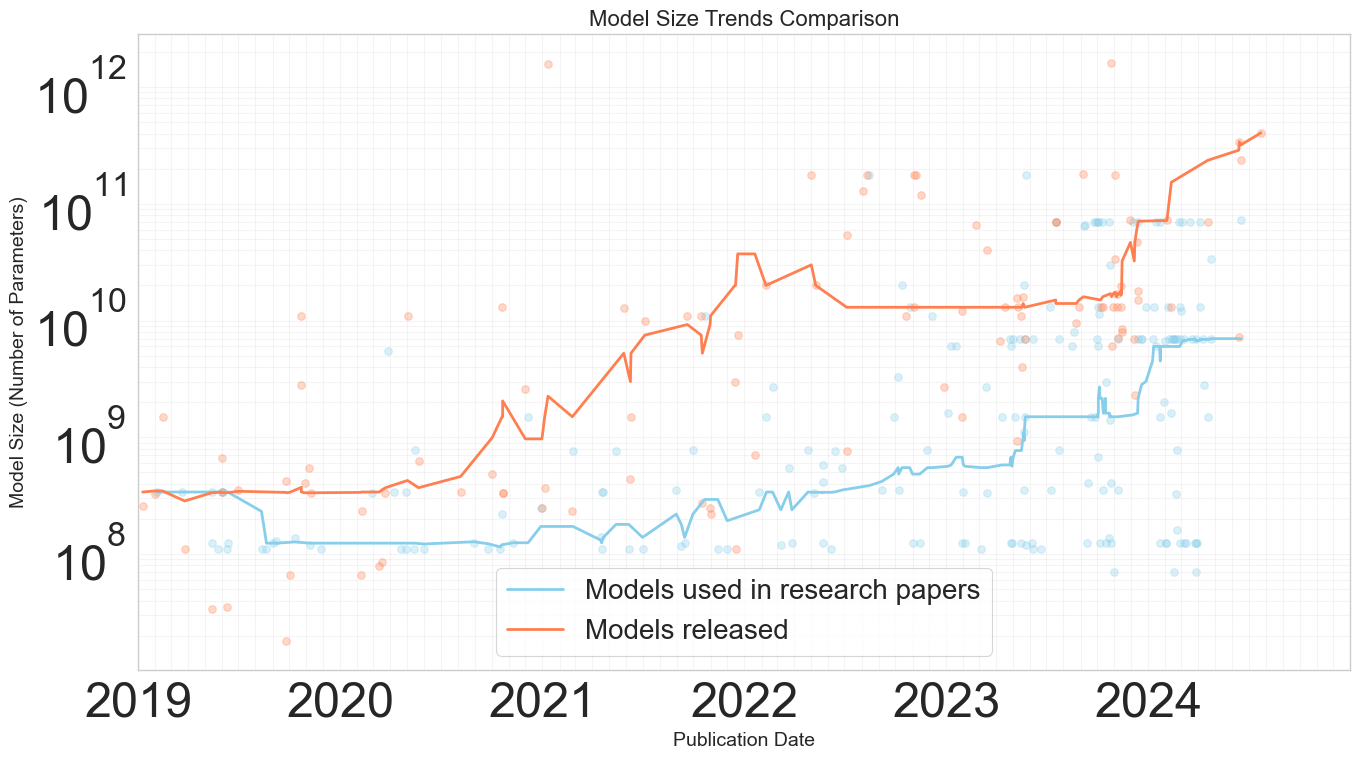

In [143]:
import matplotlib.dates as mdates

# Filter necessary columns before rolling operation
df_research_filtered = df_research[["date", "param count"]]
df_released_filtered = df_released[["date", "param count"]]

# Calculate rolling medians
df_research_rolling = (
    df_research_filtered.set_index("date").rolling(window="360D").median().reset_index()
)
df_released_rolling = (
    df_released_filtered.set_index("date").rolling(window="360D").median().reset_index()
)

# Set up the plot
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Create scatter plot
plt.scatter(
    df_research["date"], df_research["param count"], color="skyblue", alpha=0.3, s=30
)
plt.scatter(
    df_released["date"], df_released["param count"], color="coral", alpha=0.3, s=30
)

# Plot rolling mean lines
plt.plot(
    df_research_rolling["date"],
    df_research_rolling["param count"],
    color="skyblue",
    linestyle="-",
    linewidth=2,
    label="Models used in research papers",
)
plt.plot(
    df_released_rolling["date"],
    df_released_rolling["param count"],
    color="coral",
    linestyle="-",
    linewidth=2,
    label="Models released",
)

# Set y-axis to logarithmic scale
plt.yscale("log")

# Set labels and title
ax.set_title("Model Size Trends Comparison", fontsize=16)
ax.set_xlabel("Publication Date", fontsize=14)
ax.set_ylabel("Model Size (Number of Parameters)", fontsize=14)

# Customize the x-axis
ax.set_xlim(pd.Timestamp("2019-01-01"), pd.Timestamp("2024-12-31"))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Customize the grid
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Scatterplot (LOWESS)

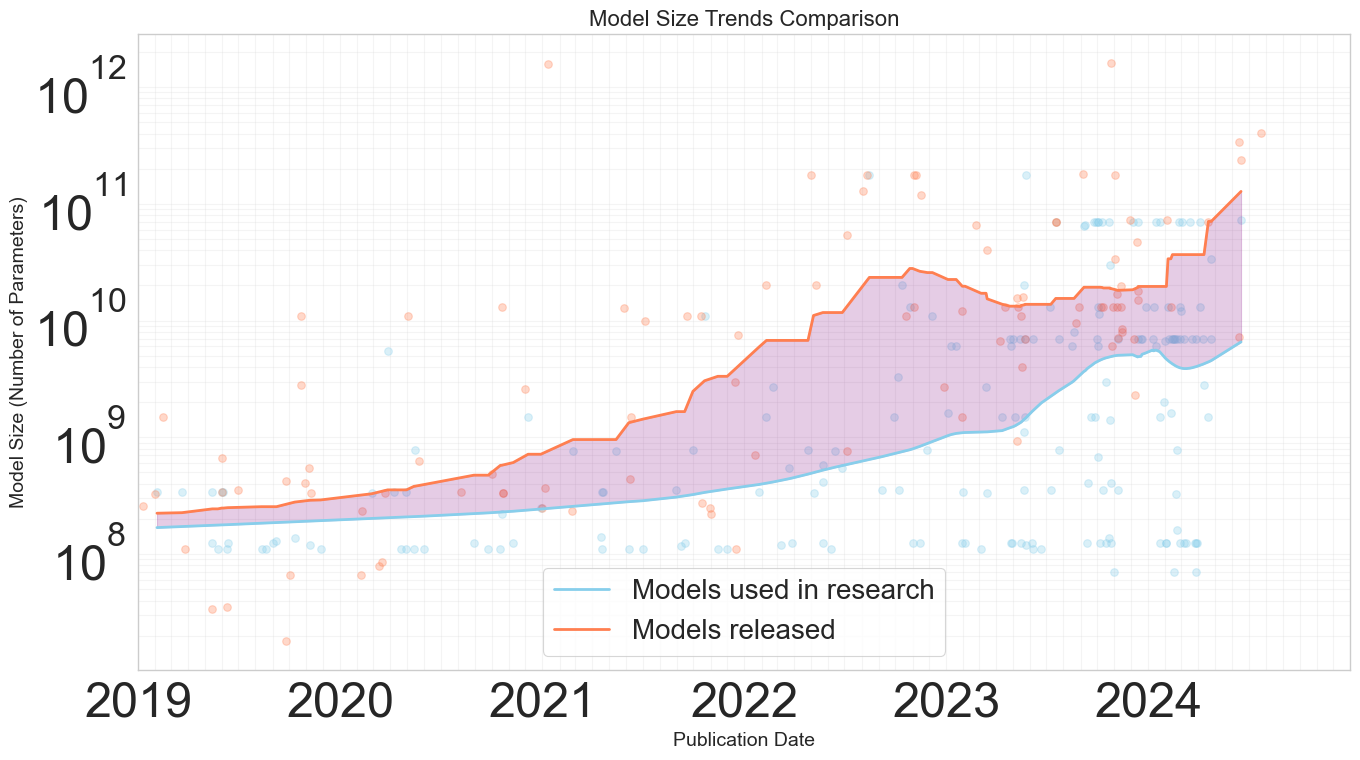

In [144]:
import matplotlib.dates as mdates
from statsmodels.nonparametric.smoothers_lowess import lowess

# Set up the plot
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Create scatter plot
plt.scatter(
    df_research["date"], df_research["param count"], color="skyblue", alpha=0.3, s=30
)
plt.scatter(
    df_released["date"], df_released["param count"], color="coral", alpha=0.3, s=30
)


# Function to calculate LOWESS
def lowess_trend(x, y, f=1.0 / 3.0):
    return lowess(y, x, frac=f)


# Calculate LOWESS trends
lowess_research = lowess_trend(
    df_research["date"].astype(int), np.log10(df_research["param count"])
)
lowess_published = lowess_trend(
    df_released["date"].astype(int), np.log10(df_released["param count"])
)

# Convert LOWESS results to DataFrames for easier manipulation
df_lowess_research = pd.DataFrame(
    {
        "date": pd.to_datetime(lowess_research[:, 0]),
        "trend": 10 ** lowess_research[:, 1],
    }
)
df_lowess_published = pd.DataFrame(
    {
        "date": pd.to_datetime(lowess_published[:, 0]),
        "trend": 10 ** lowess_published[:, 1],
    }
)

# Merge the two LOWESS DataFrames
df_lowess_merged = pd.merge_asof(
    df_lowess_research,
    df_lowess_published,
    on="date",
    suffixes=("_research", "_published"),
)

# Plot LOWESS trends
plt.plot(
    df_lowess_merged["date"],
    df_lowess_merged["trend_research"],
    color="skyblue",
    linestyle="-",
    linewidth=2,
    label="Models used in research",
)
plt.plot(
    df_lowess_merged["date"],
    df_lowess_merged["trend_published"],
    color="coral",
    linestyle="-",
    linewidth=2,
    label="Models released",
)

# Add shaded area between the lines
plt.fill_between(
    df_lowess_merged["date"],
    df_lowess_merged["trend_research"],
    df_lowess_merged["trend_published"],
    alpha=0.2,
    color="purple",
)

# Set y-axis to logarithmic scale
plt.yscale("log")

# Set labels and title
ax.set_title("Model Size Trends Comparison", fontsize=16)
ax.set_xlabel("Publication Date", fontsize=14)
ax.set_ylabel("Model Size (Number of Parameters)", fontsize=14)

# Customize the x-axis
ax.set_xlim(pd.Timestamp("2019-01-01"), pd.Timestamp("2024-12-31"))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Customize the grid
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Scatterplot (Linear Regression)

/var/folders/6x/xzgk_zn14ld1kb206ts3k5p00000gn/T/ipykernel_73505/1239496981.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dates = pd.to_datetime([pd.Timestamp.fromordinal(int(x)) for x in x_vals])


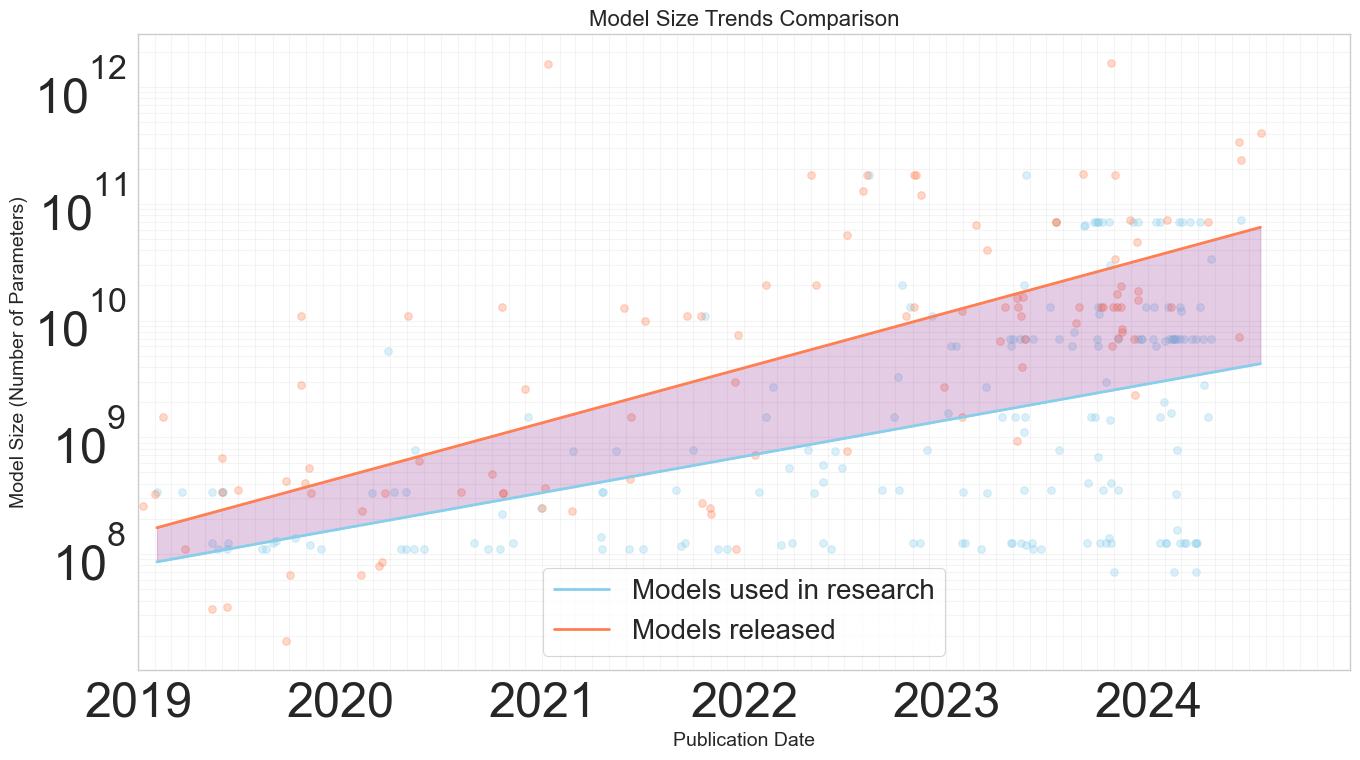

In [149]:
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

# Set up the plot
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Create scatter plot
plt.scatter(
    df_research["date"], df_research["param count"], color="skyblue", alpha=0.3, s=30
)
plt.scatter(
    df_released["date"], df_released["param count"], color="coral", alpha=0.3, s=30
)


# Function to perform linear regression
def linear_trend(x, y):
    x = x.values.reshape(-1, 1)  # Reshape for linear regression
    model = LinearRegression()
    model.fit(x, np.log10(y))
    return model


# Convert dates to ordinal (numeric format for regression)
df_research["date_ordinal"] = df_research["date"].map(pd.Timestamp.toordinal)
df_released["date_ordinal"] = df_released["date"].map(pd.Timestamp.toordinal)

# Fit linear regression models
model_research = linear_trend(df_research["date_ordinal"], df_research["param count"])
model_released = linear_trend(df_released["date_ordinal"], df_released["param count"])

# Generate trend lines
x_vals = np.arange(
    df_research["date_ordinal"].min(), df_released["date_ordinal"].max()
).reshape(-1, 1)
research_trend = 10 ** model_research.predict(x_vals)
released_trend = 10 ** model_released.predict(x_vals)

# Convert ordinal values back to dates
dates = pd.to_datetime([pd.Timestamp.fromordinal(int(x)) for x in x_vals])

# Plot linear regression trends
plt.plot(
    dates,
    research_trend,
    color="skyblue",
    linestyle="-",
    linewidth=2,
    label="Models used in research",
)
plt.plot(
    dates,
    released_trend,
    color="coral",
    linestyle="-",
    linewidth=2,
    label="Models released",
)

# Add shaded area between the lines
plt.fill_between(dates, research_trend, released_trend, alpha=0.2, color="purple")

# Set y-axis to logarithmic scale
plt.yscale("log")

# Set labels and title
ax.set_title("Model Size Trends Comparison", fontsize=16)
ax.set_xlabel("Publication Date", fontsize=14)
ax.set_ylabel("Model Size (Number of Parameters)", fontsize=14)

# Customize the x-axis
ax.set_xlim(pd.Timestamp("2019-01-01"), pd.Timestamp("2024-12-31"))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Customize the grid
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


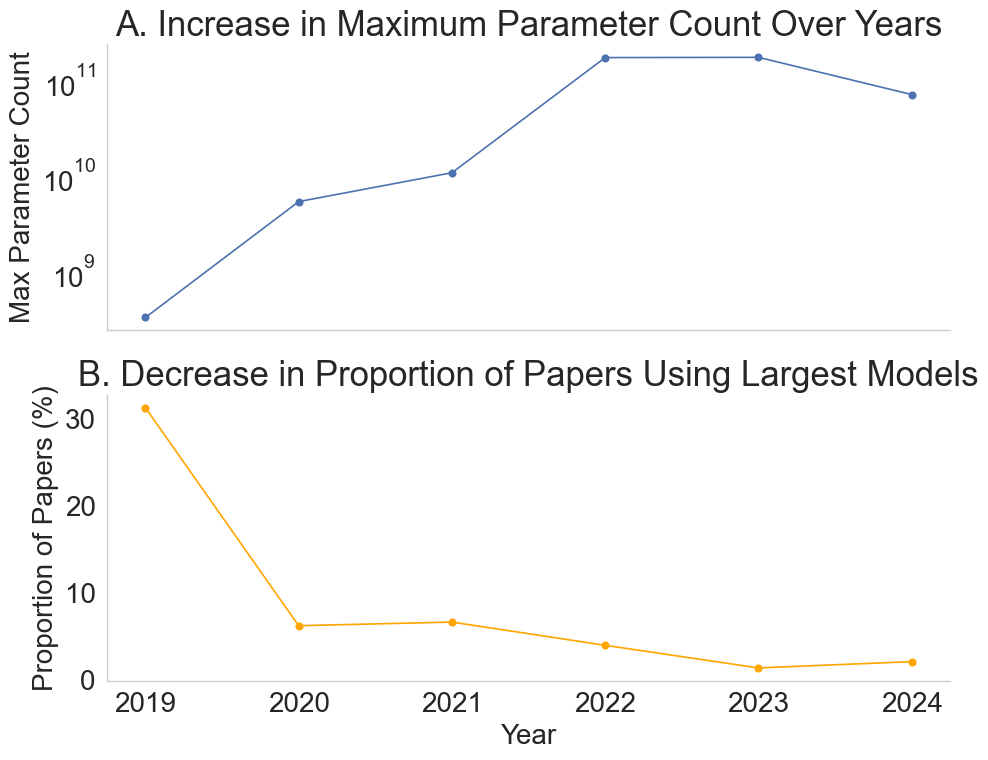

In [151]:
plt.rcParams.update(
    {
        "font.size": 20,
        "axes.labelsize": 20,
        "axes.titlesize": 25,
        "xtick.labelsize": 20,
        "ytick.labelsize": 20,
        "legend.fontsize": 20,
        "legend.title_fontsize": 25,
    }
)

df_research_c = df_research.copy()
df_research_c["publication_date"] = pd.to_datetime(
    df_research_c["publication date (first revision)"]
)
df_research_c["year"] = df_research_c["publication_date"].dt.year

# Ensure 'param count' is numeric
df_research_c["param count"] = pd.to_numeric(
    df_research_c["param count"], errors="coerce"
)
# Step 4: Create df_max_params from df_research_c

# Find the maximum parameter count for each year
df_max_params = df_research_c.groupby("year").agg({"param count": "max"}).reset_index()

# Merge back to get the model names corresponding to the max param counts
df_max_params = df_max_params.merge(
    df_research_c[["year", "param count", "model"]],
    on=["year", "param count"],
    how="left",
)

# Drop duplicates in case of multiple models with the same max param count
df_max_params = df_max_params.drop_duplicates(subset=["year"])

# Rename columns appropriately
df_max_params.rename(columns={"param count": "max_param_count"}, inplace=True)

# Step 5: Determine if Papers Used the Largest Model Available

# Merge df_research_c with df_max_params on 'year'
df_research_c = df_research_c.merge(
    df_max_params[["year", "max_param_count"]], on="year", how="left"
)

# Create a flag for whether the paper used the largest model available that year
df_research_c["used_max_model"] = (
    df_research_c["param count"] >= df_research_c["max_param_count"]
)

# Handle any missing values
df_research_c["used_max_model"] = df_research_c["used_max_model"].fillna(False)

# Step 6: Calculate the Proportion of Papers Using the Largest Models

# Group data by year
grouped = df_research_c.groupby("year")

# Calculate total number of papers per year
total_papers = grouped.size()

# Calculate number of papers that used the largest model
papers_using_max_model = grouped["used_max_model"].sum()

# Calculate the proportion
proportion_using_max = (papers_using_max_model / total_papers) * 100

# Step 7: Create the Dual-Panel Line Chart

# Initialize the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Panel A: Maximum Parameter Counts Over Years
ax1.plot(
    df_max_params["year"], df_max_params["max_param_count"], marker="o", linestyle="-"
)
ax1.set_ylabel("Max Parameter Count")
ax1.set_title("A. Increase in Maximum Parameter Count Over Years")
ax1.set_yscale("log")  # Logarithmic scale
ax1.grid(False)

# Minimalist styling
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)

# Panel B: Proportion of Papers Using the Largest Models
ax2.plot(
    proportion_using_max.index,
    proportion_using_max.values,
    marker="o",
    color="orange",
    linestyle="-",
)
ax2.set_xlabel("Year")
ax2.set_ylabel("Proportion of Papers (%)")
ax2.set_title("B. Decrease in Proportion of Papers Using Largest Models")
ax2.grid(False)

# Minimalist styling
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()